In [70]:
import pandas as pd

inst = pd.read_csv('../blog-post/instance-costs.csv', parse_dates=True)
inst = inst.iloc[1:, :] # drop total col

inst = inst.fillna(0)

inst

,InstanceType,m5.16xlarge($),p3.2xlarge($),m4.16xlarge($),p2.xlarge($),c5.4xlarge($),t2.xlarge($),c5.2xlarge($),t3.xlarge($),t2.large($),r5.2xlarge($),t2.small($),t2.nano($),t2.micro($),No Instance Type($),Total cost ($)
1,1/04/19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
2,1/05/19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
3,1/06/19,0.000000,2.145127,0.000000,76.932312,16.621273,14.767813,8.916564,0.00000,0.422964,0.118899,0.01681,0.000000,0.0,94.650113,214.591873
4,1/07/19,0.000000,177.724901,221.310931,3.588303,0.715214,6.997837,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,213.937286,624.274472
5,1/08/19,0.000000,124.743427,0.000000,1.317897,14.217182,0.000000,0.000000,0.91056,0.223631,0.000000,0.00000,0.000000,0.0,237.268823,378.681520
6,1/09/19,0.000000,21.955703,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000138,0.0,425.017953,446.973794
7,1/10/19,90.876581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,62.159211,153.035791
8,1/11/19,585.423596,0.000000,0.000000,0.000000,42.025574,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,146.832044,774.281215


In [98]:
summary = inst.sum(axis=0).to_frame()

summary = summary.iloc[1:, :]
summary.columns = ['Cost [$]']

summary.index = [str(i)[:-3] for i in summary.index]

metadata = pd.DataFrame({
    'm5.16xlarge': ['controller', 64, 256, 0],
    'p3.2xlarge': ['vae-and-memory', 8, 61, 16],
    'p2.xlarge': ['vae-and-memory', 4, 61, 12],
    
    'c5.2xlarge': ['sample-experience', 8, 16, 0],
    'c5.4xlarge': ['sample-experience', 16, 32, 0],
    
    'm4.16xlarge': ['sample-latent-stats', 16, 64, 0],
    
    't2.xlarge': ['misc', 4, 16, 0]

}).T

metadata.columns = ['component', 'cpu [num]', 'memory [GB]', 'gpu [GB]']

summary = summary.drop('No Instance Type', axis=0)
summary = summary.drop('Total cost ', axis=0)

summary

,Cost [$]
m5.16xlarge,676.3
p3.2xlarge,326.569
m4.16xlarge,221.311
p2.xlarge,81.8385
c5.4xlarge,73.5792
t2.xlarge,21.7657
c5.2xlarge,8.91656
t3.xlarge,0.91056
t2.large,0.646595
r5.2xlarge,0.118899


In [99]:
metadata.head()

,component,cpu [num],memory [GB],gpu [GB]
m5.16xlarge,controller,64,256,0
p3.2xlarge,vae-and-memory,8,61,16
p2.xlarge,vae-and-memory,4,61,12
c5.2xlarge,sample-experience,8,16,0
c5.4xlarge,sample-experience,16,32,0


In [103]:
out = pd.concat([metadata, summary], axis=1, sort=False).sort_values('Cost [$]', ascending=False)

out = out.dropna(axis=0)

out

,component,cpu [num],memory [GB],gpu [GB],Cost [$]
m5.16xlarge,controller,64,256,0,676.3
p3.2xlarge,vae-and-memory,8,61,16,326.569
m4.16xlarge,sample-latent-stats,16,64,0,221.311
p2.xlarge,vae-and-memory,4,61,12,81.8385
c5.4xlarge,sample-experience,16,32,0,73.5792
t2.xlarge,misc,4,16,0,21.7657
c5.2xlarge,sample-experience,8,16,0,8.91656


In [105]:
out.groupby('component').sum().sort_values('Cost [$]', ascending=False)

,cpu [num],memory [GB],gpu [GB],Cost [$]
component,,,,
controller,64,256,0,676.300177
vae-and-memory,12,122,28,408.407671
sample-latent-stats,16,64,0,221.310931
sample-experience,24,48,0,82.495807
misc,4,16,0,21.765650


In [ ]:
# want per component, per month!

In [126]:
serv = pd.read_csv('../blog-post/service-costs.csv')
serv = serv.iloc[1:, :]

serv = serv.fillna(0)

serv = serv.set_index('Service', drop=True)
serv

,EC2-Instances($),EC2-Other($),Tax($),S3($),Key Management Service($),Elastic File System($),SNS($),CloudWatch($),Total cost ($)
Service,,,,,,,,,
1/04/19,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000
1/05/19,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000
1/06/19,119.966624,41.053860,28.00,25.571389,0.0,0.0,0.0,0.0,214.591873
1/07/19,410.337186,102.278913,81.44,30.218373,0.0,0.0,0.0,0.0,624.274472
1/08/19,141.507182,172.378037,49.39,15.406301,0.0,0.0,0.0,0.0,378.681520
1/09/19,21.955841,355.602565,58.30,11.115388,0.0,0.0,0.0,0.0,446.973794
1/10/19,90.876581,31.083830,19.96,11.115381,0.0,0.0,0.0,0.0,153.035791
1/11/19,627.458762,34.421696,100.98,11.420756,0.0,0.0,0.0,0.0,774.281215


In [127]:
per_serv = serv.sum(axis=0).to_frame()
per_serv = per_serv.iloc[1:, :]

per_serv

,0
EC2-Other($),736.818901
Tax($),338.070000
S3($),104.847589
Key Management Service($),0.000000
Elastic File System($),0.000000
SNS($),0.000000
CloudWatch($),0.000000
Total cost ($),2591.838665


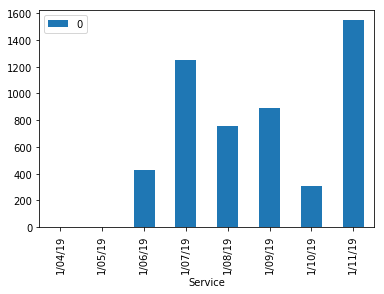

In [132]:
# put agent numbers on here
month = serv.sum(axis=1).to_frame()

month.index = serv.index

month.plot(kind='bar')